In [942]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Load mpg dataset and prepare for classification

In [943]:
df = sns.load_dataset('mpg')
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [944]:
df['origin_numbered'] = df.origin.map({'europe' : 1, 'japan' : 1, 'usa':0})
df['origin_simple'] = df.origin.map({'europe' : 'non-usa', 'japan' : 'non-usa', 'usa':'usa'})

# Using a linear model to predict classes
We use only mpg as feature in the beginning.

In [945]:
df_model = df[df.model_year<76].copy()
X = df_model[['mpg']]
y = df_model.origin_numbered

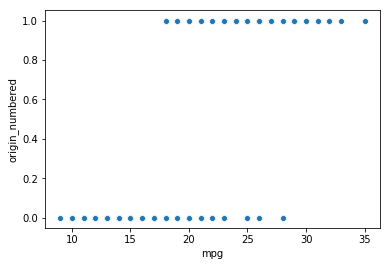

In [946]:
sns.scatterplot(x=X.mpg, y=y); plt.show()

## We could fit a linear model: y = m*x + b
We need to specify a threshold (e.g. 0.5)<br>
- y below 0.5 -> usa
- y above 0.5 -> non-usa

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


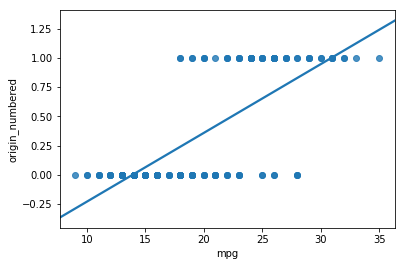

In [947]:
sns.regplot(x=X.mpg, y=y, ci=False); plt.show()

In [948]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
print("intercept = {}, slope = {}".format(lr.intercept_, lr.coef_))

intercept = -0.8197653711586339, slope = [0.0588822]


## We could then use this function combined with a threshold value and predict the class

In [949]:
thr = 0.5
df_model['prediction'] = lr.predict(df_model[['mpg']]) > thr
df_model['correct_prediction'] = df_model.origin_numbered == df_model.prediction
print("Accuracy: {}".format(df_model.correct_prediction.sum() / len(df_model)))

Accuracy: 0.8777777777777778


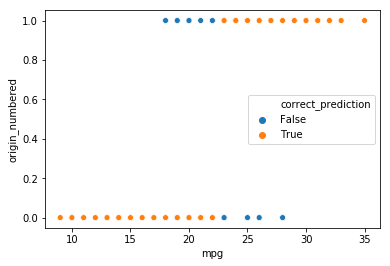

In [950]:
sns.scatterplot(x=X.mpg, y=y, hue=df_model.correct_prediction); plt.show()

# For classification however, one usually relies on the logistic function that is fitted to the data

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


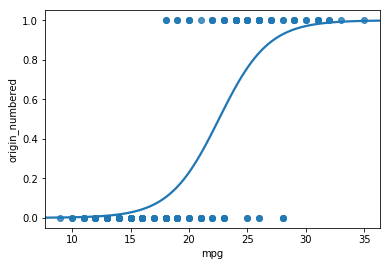

In [951]:
sns.regplot(x=X.mpg, y=y, ci=False, logistic=True); plt.show()

In [952]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X, y)

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## The prediction can be applied as usual

In [953]:
print(X.mpg.values)
print(logr.predict(X)) # threshold = 0.5 (default)

[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 24. 22. 18. 21.
 27. 26. 25. 24. 25. 26. 21. 10. 10. 11.  9. 27. 28. 25. 19. 16. 17. 19.
 18. 14. 14. 14. 14. 12. 13. 13. 18. 22. 19. 18. 23. 28. 30. 30. 31. 35.
 27. 26. 24. 25. 23. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13. 19. 15.
 13. 13. 14. 18. 22. 21. 26. 22. 28. 23. 28. 27. 13. 14. 13. 14. 15. 12.
 13. 13. 14. 13. 12. 13. 18. 16. 18. 18. 23. 26. 11. 12. 13. 12. 18. 20.
 21. 22. 18. 19. 21. 26. 15. 16. 29. 24. 20. 19. 15. 24. 20. 11. 20. 19.
 15. 31. 26. 32. 25. 16. 16. 18. 16. 13. 14. 14. 14. 29. 26. 26. 31. 32.
 28. 24. 26. 24. 26. 31. 19. 18. 15. 15. 16. 15. 16. 14. 17. 16. 15. 18.
 21. 20. 13. 29. 23. 20. 23. 24. 25. 24. 18. 29. 19. 23. 23. 22. 25. 33.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0

In [954]:
df_model['prediction_logr'] = logr.predict(X)
df_model['correct_prediction_logr'] = df_model.origin_numbered == df_model.prediction_logr
print("Accuracy: {}".format(df_model.correct_prediction_logr.sum() / len(df_model)))

Accuracy: 0.8777777777777778


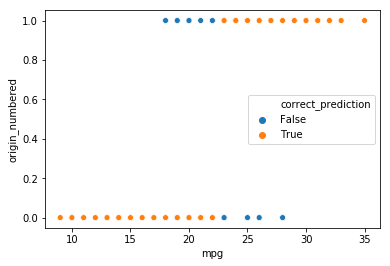

In [955]:
sns.scatterplot(x=X.mpg, y=y, hue=df_model.correct_prediction); plt.show()

## We can take a detailed look at the predicted probabilities

In [956]:
print(X.mpg.values)
print(logr.predict_proba(X))  # column 1 --> probability that the car is from "non-usa"

[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 24. 22. 18. 21.
 27. 26. 25. 24. 25. 26. 21. 10. 10. 11.  9. 27. 28. 25. 19. 16. 17. 19.
 18. 14. 14. 14. 14. 12. 13. 13. 18. 22. 19. 18. 23. 28. 30. 30. 31. 35.
 27. 26. 24. 25. 23. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13. 19. 15.
 13. 13. 14. 18. 22. 21. 26. 22. 28. 23. 28. 27. 13. 14. 13. 14. 15. 12.
 13. 13. 14. 13. 12. 13. 18. 16. 18. 18. 23. 26. 11. 12. 13. 12. 18. 20.
 21. 22. 18. 19. 21. 26. 15. 16. 29. 24. 20. 19. 15. 24. 20. 11. 20. 19.
 15. 31. 26. 32. 25. 16. 16. 18. 16. 13. 14. 14. 14. 29. 26. 26. 31. 32.
 28. 24. 26. 24. 26. 31. 19. 18. 15. 15. 16. 15. 16. 14. 17. 16. 15. 18.
 21. 20. 13. 29. 23. 20. 23. 24. 25. 24. 18. 29. 19. 23. 23. 22. 25. 33.]
[[0.75043003 0.24956997]
 [0.85420976 0.14579024]
 [0.75043003 0.24956997]
 [0.82428326 0.17571674]
 [0.78972591 0.21027409]
 [0.85420976 0.14579024]
 [0.87978279 0.12021721]
 [0.87978279 0.12021721]
 [0.87978279 0.12021721]
 [0.85420976 0.14579024]
 [0.85420976 0.1457

## We can adjust the threshold at which we want to assign a car to "non-usa"
The default threshold is 0.5 (which is used by the predict-method)

In [957]:
thr = 0.5
print(X.mpg.values)
print(logr.predict_proba(X)[:, 1] >= thr)  # column 1 --> probability car is from "non-usa" (remember: False = 0, True = 1 !)

[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 24. 22. 18. 21.
 27. 26. 25. 24. 25. 26. 21. 10. 10. 11.  9. 27. 28. 25. 19. 16. 17. 19.
 18. 14. 14. 14. 14. 12. 13. 13. 18. 22. 19. 18. 23. 28. 30. 30. 31. 35.
 27. 26. 24. 25. 23. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13. 19. 15.
 13. 13. 14. 18. 22. 21. 26. 22. 28. 23. 28. 27. 13. 14. 13. 14. 15. 12.
 13. 13. 14. 13. 12. 13. 18. 16. 18. 18. 23. 26. 11. 12. 13. 12. 18. 20.
 21. 22. 18. 19. 21. 26. 15. 16. 29. 24. 20. 19. 15. 24. 20. 11. 20. 19.
 15. 31. 26. 32. 25. 16. 16. 18. 16. 13. 14. 14. 14. 29. 26. 26. 31. 32.
 28. 24. 26. 24. 26. 31. 19. 18. 15. 15. 16. 15. 16. 14. 17. 16. 15. 18.
 21. 20. 13. 29. 23. 20. 23. 24. 25. 24. 18. 29. 19. 23. 23. 22. 25. 33.]
[False False False False False False False False False False False False
 False False  True False False False  True  True  True  True  True  True
 False False False False False  True  True  True False False False False
 False False False False False False False False F

In [958]:
thr = 0.2
print(X.mpg.values)
print(logr.predict_proba(X)[:, 1] >= thr)  # column 1 --> probability car is from "non-usa" (remember: False = 0, True = 1 !)

[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 24. 22. 18. 21.
 27. 26. 25. 24. 25. 26. 21. 10. 10. 11.  9. 27. 28. 25. 19. 16. 17. 19.
 18. 14. 14. 14. 14. 12. 13. 13. 18. 22. 19. 18. 23. 28. 30. 30. 31. 35.
 27. 26. 24. 25. 23. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13. 19. 15.
 13. 13. 14. 18. 22. 21. 26. 22. 28. 23. 28. 27. 13. 14. 13. 14. 15. 12.
 13. 13. 14. 13. 12. 13. 18. 16. 18. 18. 23. 26. 11. 12. 13. 12. 18. 20.
 21. 22. 18. 19. 21. 26. 15. 16. 29. 24. 20. 19. 15. 24. 20. 11. 20. 19.
 15. 31. 26. 32. 25. 16. 16. 18. 16. 13. 14. 14. 14. 29. 26. 26. 31. 32.
 28. 24. 26. 24. 26. 31. 19. 18. 15. 15. 16. 15. 16. 14. 17. 16. 15. 18.
 21. 20. 13. 29. 23. 20. 23. 24. 25. 24. 18. 29. 19. 23. 23. 22. 25. 33.]
[ True False  True False  True False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True False False False False  True  True  True  True False  True  True
  True False False False False False False False  

### The threshold determines, at which of the model's predicted probability the prediction "switches" to "non-usa"
Low threshold: switch to non-usa "early"<br>
High threshold: switch to non-usa "late"<br>
The default is 0.5 (when using predict)

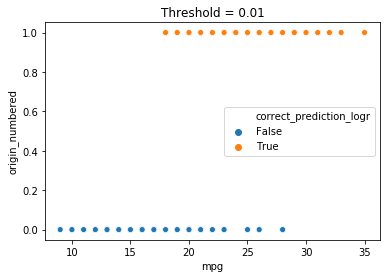

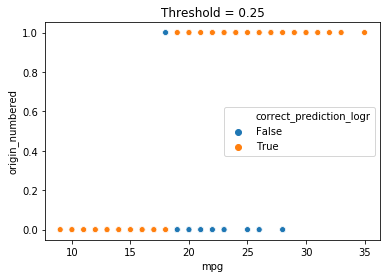

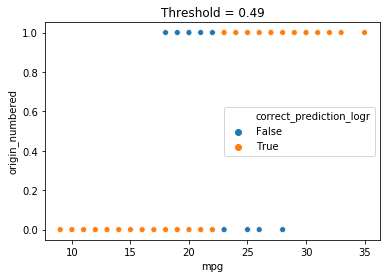

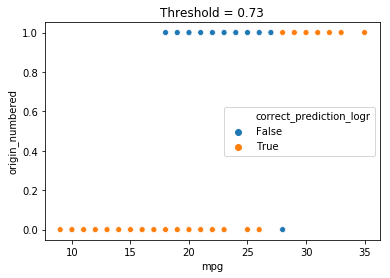

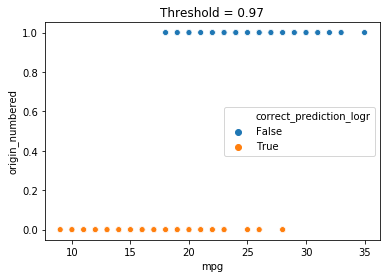

In [959]:
for i in range(1, 101, 24):
    thr = round(i / 100.0, 2)
    df_model['prediction_logr'] = logr.predict_proba(X)[:, 1] > thr
    df_model['correct_prediction_logr'] = df_model.origin_numbered == df_model.prediction_logr
    sns.scatterplot(x=X.mpg, y=y, hue=df_model.correct_prediction_logr).set_title("Threshold = {}".format(thr)); plt.show()

# Evaluating classification models with the confusion matrix

In [960]:
# the confusion matrix can be calculated by sklearn metrics
from sklearn.metrics import confusion_matrix

In [961]:
prediction = logr.predict(X)
confusion_matrix(y, prediction)

array([[111,  11],
       [ 11,  47]], dtype=int64)

We can create a heatmap plot for better visualization:

In [962]:
def plot_cnf_matrix(cnf_matrix):
    class_names=[0, 1] # name  of classes
    fig, ax = plt.subplots(figsize=(4,2.5))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size":16}, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

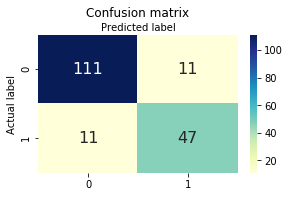

In [963]:
prediction = logr.predict(X)  # threshold = default = 0.5
plot_cnf_matrix(confusion_matrix(y, prediction))

### Calculation of some metrics

In [964]:
from sklearn import metrics
def print_metrics(y, prediction, threshold=0.5):
    accuracy = metrics.accuracy_score(y, prediction)
    precision = metrics.precision_score(y, prediction)
    recall = metrics.recall_score(y, prediction)
    cnf_matrix = metrics.confusion_matrix(y, prediction)
    fpr = cnf_matrix[0, 1] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])
    print("Threshold: {:.2f}  | Accuracy : {:.2f} - Precision: {:.2f} - Recall(=TPR) : {:.2f} - FPR : {:.2f}".format(threshold, accuracy, precision, recall, fpr))
        
print_metrics(y, prediction)

Threshold: 0.50  | Accuracy : 0.88 - Precision: 0.81 - Recall(=TPR) : 0.81 - FPR : 0.09


Accuracy = (111 + 47) / (111 + 11 + 11 + 47) = 0.88<br>
Precision = 47 / (47 + 11) = 81% (the 11 in the top-right) <br>
Recall = TPR = 47 / (47 + 11) = 81% (the eleven in the bottom-left) <br>
FPR = FP / N = 11 / (111 + 11) = 9%

### We can adjust the threshold at which a car is classified as non-usa (default was 0.5)
E.g. if it is really important to classify a car as a non-usa car, we would lower the threshold. <br>
A more realistic example: it might be highly important to classify someone as ill if there is the slightest chance, since the benefit is much larger compared to the struggles when being classified false-positive.

Threshold: 0.01  | Accuracy : 0.32 - Precision: 0.32 - Recall(=TPR) : 1.00 - FPR : 1.00


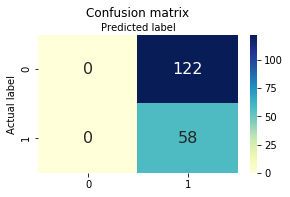

Threshold: 0.25  | Accuracy : 0.82 - Precision: 0.64 - Recall(=TPR) : 0.97 - FPR : 0.25


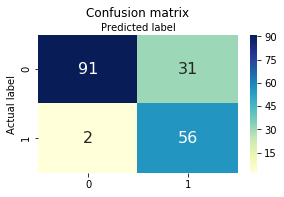

Threshold: 0.49  | Accuracy : 0.88 - Precision: 0.81 - Recall(=TPR) : 0.81 - FPR : 0.09


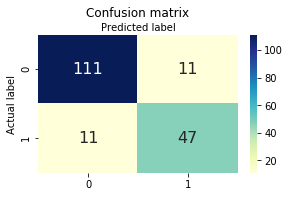

Threshold: 0.73  | Accuracy : 0.75 - Precision: 0.84 - Recall(=TPR) : 0.28 - FPR : 0.02


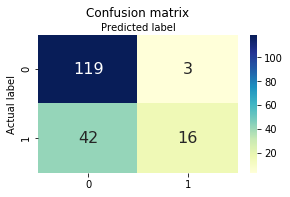

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Threshold: 0.97  | Accuracy : 0.68 - Precision: 0.00 - Recall(=TPR) : 0.00 - FPR : 0.00


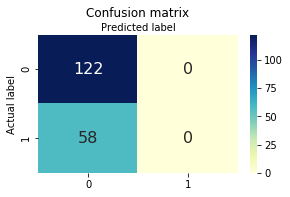

In [965]:
for i in range(1, 101, 24):
    thr = round(i / 100.0, 2)
    prediction = (logr.predict_proba(X) >= thr)[:, 1]
    print_metrics(y, prediction, thr)
    plot_cnf_matrix(confusion_matrix(y, prediction))

True positive rate = recall = sensitivity: "probability of detection"<br>
False positive rate = 1 - specificity: probability of false alarm.

# The ROC (receiver operating characteristic) curve
Instead of calculating all confusion matrices and comparing them, there is a way to show a model's performance to distinguish classes in a more aggregated way.<br>
The idea of varying the threshold is the same. The values of FPR and TPR are put into a diagram with:<br>
x-axis: FPR = 1 - specificity<br>
y-axis: TPR = recall = sensitivity

In [968]:
from sklearn.metrics import roc_curve

def plot_roc(y, prediction_probas, label=''):
    fpr, tpr, thresholds = roc_curve(y, prediction_probas)  # the roc-curve values are calculated by sklearn
    # create plot
    plt.plot(fpr, tpr, label='ROC curve (class non-usa)')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ' + label)
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc="lower right")
    plt.show()

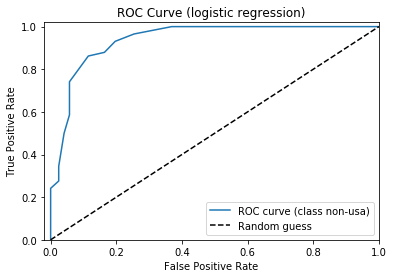

In [970]:
prediction_probabilities_nonusa = logr.predict_proba(df_model[['mpg']])[:, 1]  # non-usa = class 1
plot_roc(y, prediction_probabilities_nonusa, label="(logistic regression)")

# A good classifier is characterized by a large "area under (ROC) curve" (AUC)
The curve should be in the upper left part of the diagram. The ROC visualizes, how "sure" our model is when distinguishing between classes. When it's close to random guess, it is not a good model!

In [973]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, prediction_probabilities_nonusa)

0.9390192198982475

## We have to compare different classifiers using ROC
A train-test-split is mandatory! Let us use more data and more features.

In [974]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['mpg', 'weight', 'horsepower', 'acceleration', 'cylinders', 'displacement']], 
                                                    df.origin_numbered)

In [975]:
def find_optimal_threshold(y_test, y_probas):
    """ find the optimal threshold using Youden's J statistic """
    fpr, tpr, thresholds = roc_curve(y_test, y_probas)  # the roc-curve values are calculated by sklearn
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

### Logistic Regression

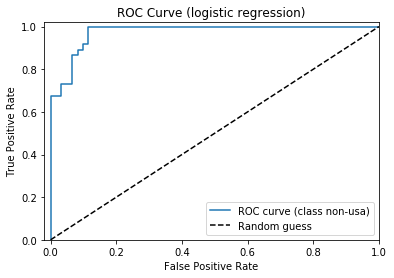

ROC_AUC: 0.9752
Optimal threshold: 0.2937
Accuracy: 0.9082


In [976]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

y_probas = clf.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
plot_roc(y_test, y_probas[:,1], label="(logistic regression)")
print("ROC_AUC: {:.4f}".format(roc_auc_score(y_test, y_probas[:,1])))
print("Optimal threshold: {:.4f}".format(find_optimal_threshold(y_test, y_probas[:,1])))
print("Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

### Decision Tree (simple)

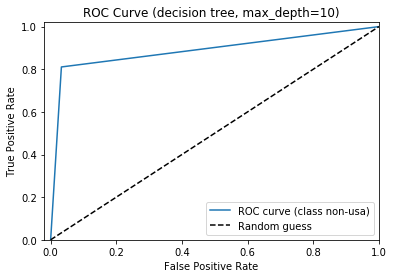

ROC_AUC: 0.8890
Optimal threshold: 1.0000
Accuracy: 0.9082


In [977]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

y_probas = clf.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
plot_roc(y_test, y_probas[:,1], label="(decision tree, max_depth=10)")
print("ROC_AUC: {:.4f}".format(roc_auc_score(y_test, y_probas[:,1])))
print("Optimal threshold: {:.4f}".format(find_optimal_threshold(y_test, y_probas[:,1])))
print("Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

### kNN

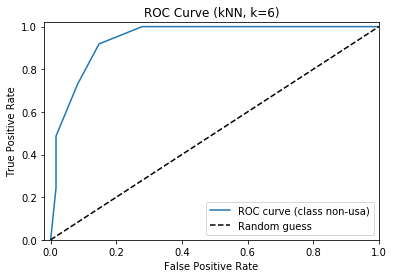

ROC_AUC: 0.9431
Optimal threshold: 0.4000
Accuracy: 0.8469


In [978]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_probas = clf.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
plot_roc(y_test, y_probas[:,1], label="(kNN, k=6)")
print("ROC_AUC: {:.4f}".format(roc_auc_score(y_test, y_probas[:,1])))
print("Optimal threshold: {:.4f}".format(find_optimal_threshold(y_test, y_probas[:,1])))
print("Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

### Naive Bayes

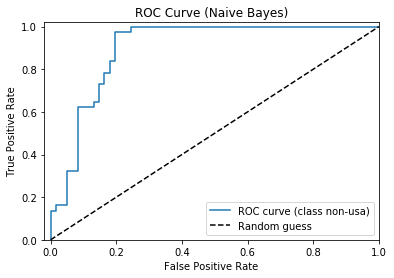

ROC_AUC: 0.8999
Optimal threshold: 0.0003
Accuracy: 0.8469


In [979]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

y_probas = clf.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
plot_roc(y_test, y_probas[:,1], label="(Naive Bayes)")
print("ROC_AUC: {:.4f}".format(roc_auc_score(y_test, y_probas[:,1])))
print("Optimal threshold: {:.4f}".format(find_optimal_threshold(y_test, y_probas[:,1])))
# be careful when inspecting probabilities of a naive bayes classification
print("Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


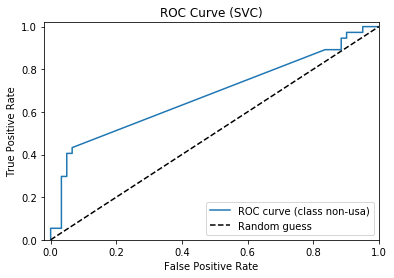

ROC_AUC: 0.6799
Optimal threshold: 0.3738
Accuracy: 0.6429


In [981]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(X_train, y_train)

y_probas = clf.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
plot_roc(y_test, y_probas[:,1], label="(SVC)")
print("ROC_AUC: {:.4f}".format(roc_auc_score(y_test, y_probas[:,1])))
print("Optimal threshold: {:.4f}".format(find_optimal_threshold(y_test, y_probas[:,1])))
print("Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

### Random Guess

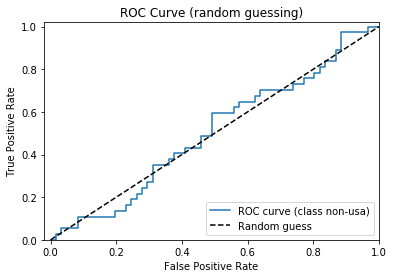

ROC_AUC: 0.5024
Optimal threshold: 0.5136


In [982]:
from numpy.random import rand
y_probas = rand(len(X_test)) 
plot_roc(y_test, y_probas, label="(random guessing)")
print("ROC_AUC: {:.4f}".format(roc_auc_score(y_test, y_probas)))
print("Optimal threshold: {:.4f}".format(find_optimal_threshold(y_test, y_probas)))

# Visualization of the Decision Boundary of Logistic Regression

In [983]:
X = df[['mpg', 'weight']]
y = df['origin_simple'].map({'usa':0, 'non-usa':1, 'non-usa':1})  # the visualization below cannot work with nominal values

clf_arr = []  # this array holds the knn-predictors
clf_name_arr = []  # this array holds the names of the knn-predictors for visualization
for i in range(1):
    clf = LogisticRegression(solver='liblinear')
    clf.fit(X, y)
    clf_arr.append(clf)
    clf_name_arr.append("Logistic Regression (default)")


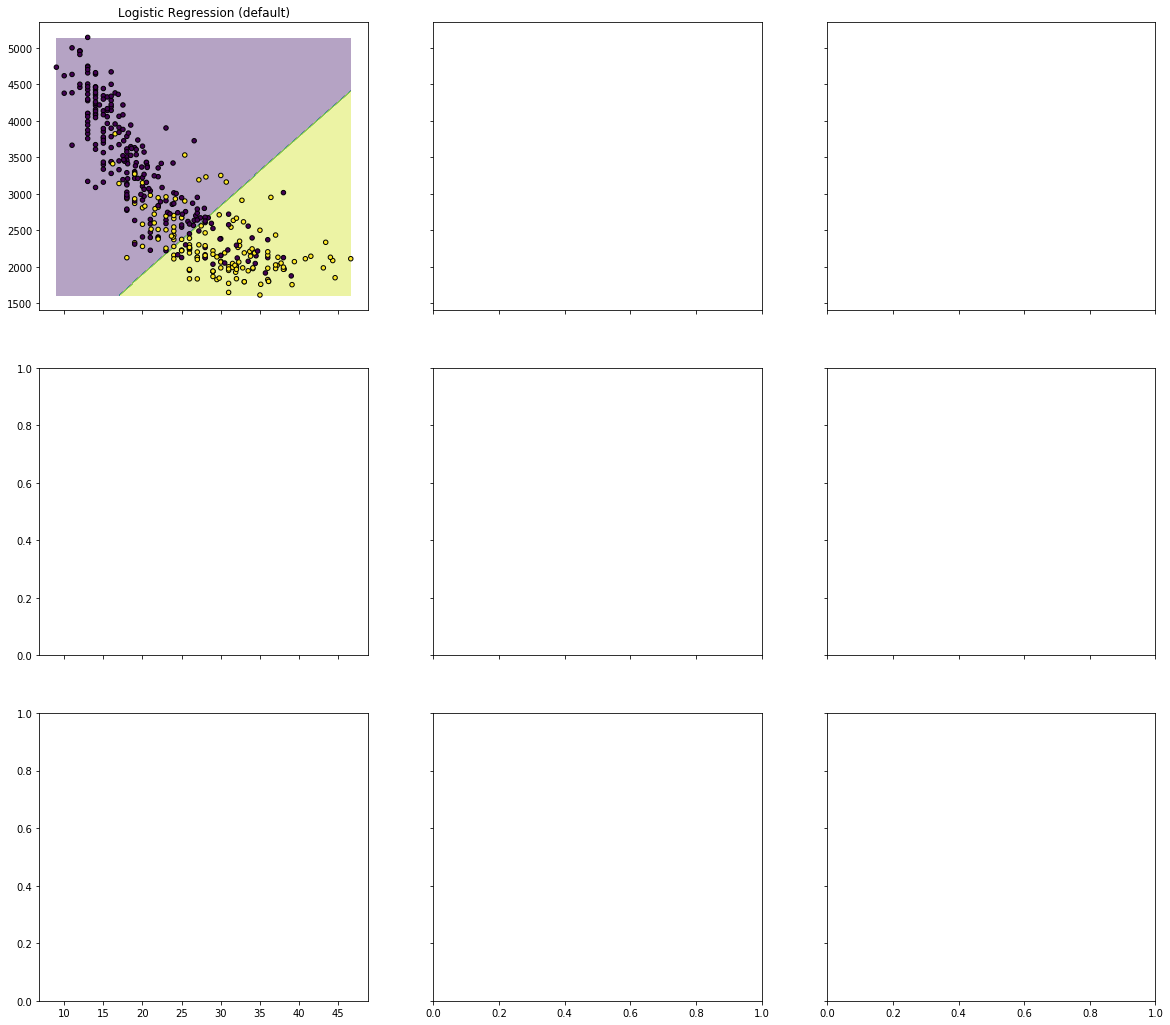

In [984]:
# for the approach, see https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

from itertools import product

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()  # this is always 0,1 if MinMaxSclaer is used
y_min, y_max = X.iloc[:, 1].min(), X.iloc[:, 1].max() # this is always 0,1 if MinMaxSclaer is used
steps = 300  # --> looks better if larger
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/steps),
                     np.arange(y_min, y_max, (y_max-y_min)/steps))  


f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 18))

# for each model, create the decision boundary and plot it into the right sub-plot (via idx)
for idx, clf, tt in zip(product([0,1,2], [0,1,2]), clf_arr, clf_name_arr):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # predict the mesh
       
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)  # draw decision boundary
    axarr[idx[0], idx[1]].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')  # plot the original data (normalized)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()